# Feed Forward NN with Pytorch
Trying things out on the MNIST dataset:
[copy pasta source](https://www.youtube.com/watch?app=desktop&v=oPhxf2fXHkQ)

In [46]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import pandas as pd

In [47]:
# only for MINST
import torchvision
import torchvision.transforms as transforms

### 0 Config and Parameters

In [48]:
# config
device = torch.device('cuda' if torch.cuda.is_available else 'cpu')

In [49]:
# hyperparameters
in_dim = 784 #1001
hidden_dim = 100
out_dim = 10 #4
epochs = 10 #90
batch = 500
lr = 0.01

### 1 Dataloader

In [50]:
train_data = torchvision.datasets.MNIST(root="./data", train=True,
                                       transform=transforms.ToTensor(), 
                                       download = True)

In [51]:
test_data = torchvision.datasets.MNIST(root="./data", train=False,
                                       transform=transforms.ToTensor())

In [52]:
train_loader = torch.utils.data.DataLoader(
    dataset=train_data,
    batch_size = batch,
    shuffle=True)

test_loader = torch.utils.data.DataLoader(
    dataset=test_data,
    batch_size = batch,
    shuffle=False)

In [53]:
# print the size of one batch and the labels
example = iter(train_loader)
samples, labels = example.next()
print(samples.shape, labels.shape)

torch.Size([500, 1, 28, 28]) torch.Size([500])


`torch.Size([500, 1, 28, 28]) torch.Size([500])` means
500 samples in one batch
1 channel (1 colour)
28x28 image array
label tensor of size 500 (one for each sample in our batch)

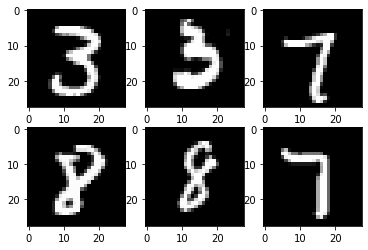

In [54]:
# plot samples
for i in range (6):
    plt.subplot(2, 3, i+1)
    # [0] means first channel (we only have one)
    plt.imshow(samples[i][0], cmap='gray')
plt.show()

### 2 MLP Layers and Activation

In [55]:
# TODO: learn how python init, self etc works
class NN(nn.Module):
    def __init__(self, in_dim, hidden_dim, out_dim):
        super(NN, self).__init__()
        # define layers
        self.l1 = nn.Linear(in_dim, hidden_dim)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_dim, out_dim)
    
    # applies layers with sample x
    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        return out

model = NN(in_dim, hidden_dim, out_dim)

### 3 Loss and Optimizer

In [56]:
criterion = nn.CrossEntropyLoss() # this also applies softmax for us
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

### 4 Training Loop and Batch Size

In [57]:
# one step for each batch
n_steps = len(train_loader)

for epoch in range(epochs):
    # loop over & unpack batches
    for i, (images, labels) in enumerate(train_loader):
        # reshape image tensor (MNIST specific) to 100, 784
        # INFO: use to(device) if a GPU is available
        images = images.reshape(-1, 28*28) #.to(device)
        #labels = labels.to(device)
        
        # forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        # print loss every 100th step
        if (i+1) % 100 == 0:
            print(f"epoch {epoch+1} / {epochs}, step {i+1}/{n_steps}, loss = {loss.item():.4}")

epoch 1 / 10, step 100/120, loss = 0.2043
epoch 2 / 10, step 100/120, loss = 0.1547
epoch 3 / 10, step 100/120, loss = 0.06715
epoch 4 / 10, step 100/120, loss = 0.06827
epoch 5 / 10, step 100/120, loss = 0.03179
epoch 6 / 10, step 100/120, loss = 0.03781
epoch 7 / 10, step 100/120, loss = 0.02319
epoch 8 / 10, step 100/120, loss = 0.05539
epoch 9 / 10, step 100/120, loss = 0.05791
epoch 10 / 10, step 100/120, loss = 0.02549


### 5 Evaluation

In [60]:
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        # add to(device) for GPU support
        images = images.reshape(-1, 28*28)
        # test the trained model
        outputs = model(images)
        
        # value, index
        _, predictions = torch.max(outputs, 1)
        n_samples += labels.shape[0] # gives us n of samples of current batch
        n_correct += (predictions == labels).sum().item()
    
    # accuracy in percent
    acc = 100.0 * n_correct / n_samples
    print(f'accuracy = {acc}')
        

accuracy = 97.37


`accuracy = 97.37` seems good! This is how building an MLP with pytorch works. 